In [26]:
# https://www.kaggle.com/code/pasqualebalsebre/a-ml-analysis-of-california-housing-data/notebook

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [27]:
# load dataFrame
data = pd.read_csv("data/housing.csv")
#Drop columns without meaningful data
data.drop(['longitude', 'latitude'], axis=1, inplace=True)
# Fill the NAN value with the intermediate value
data.fillna(data["total_bedrooms"].mean(), inplace=True)
# Independent columns
X = data.iloc[:, data.columns != "ocean_proximity"]
# target column (median_house_value)
Y = data.iloc[:, data.columns == "ocean_proximity"]

X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [28]:
# Standardizing the features
X = StandardScaler().fit_transform(X)
X

array([[ 0.98214266, -0.8048191 , -0.97522785, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-0.60701891,  2.0458901 ,  1.3550882 , ...,  1.66996103,
         2.33223796,  1.31415614],
       [ 1.85618152, -0.53574589, -0.82973217, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.92485123, -0.17499526, -0.12610552, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.84539315, -0.35559977, -0.30737883, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-1.00430931,  0.06840827,  0.18635241, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [29]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, Y], axis=1)

finalDf

,principal component 1,principal component 2,principal component 3,ocean_proximity
0,-1.808204,3.303996,0.435270,NEAR BAY
1,3.215133,2.434596,-0.203581,NEAR BAY
2,-1.724675,2.321862,1.275137,NEAR BAY
3,-1.685458,1.639258,1.456281,NEAR BAY
4,-1.550234,0.981596,1.676461,NEAR BAY
...,...,...,...,...
20635,-0.923287,-1.584615,-0.421569,INLAND
20636,-1.737326,-1.177600,-1.261897,INLAND
20637,-0.313200,-1.492781,-0.911446,INLAND
20638,-0.725428,-1.444955,-0.954245,INLAND


In [30]:
print(sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

0.926919420251171


array([0.55481574, 0.24291804, 0.12918564])

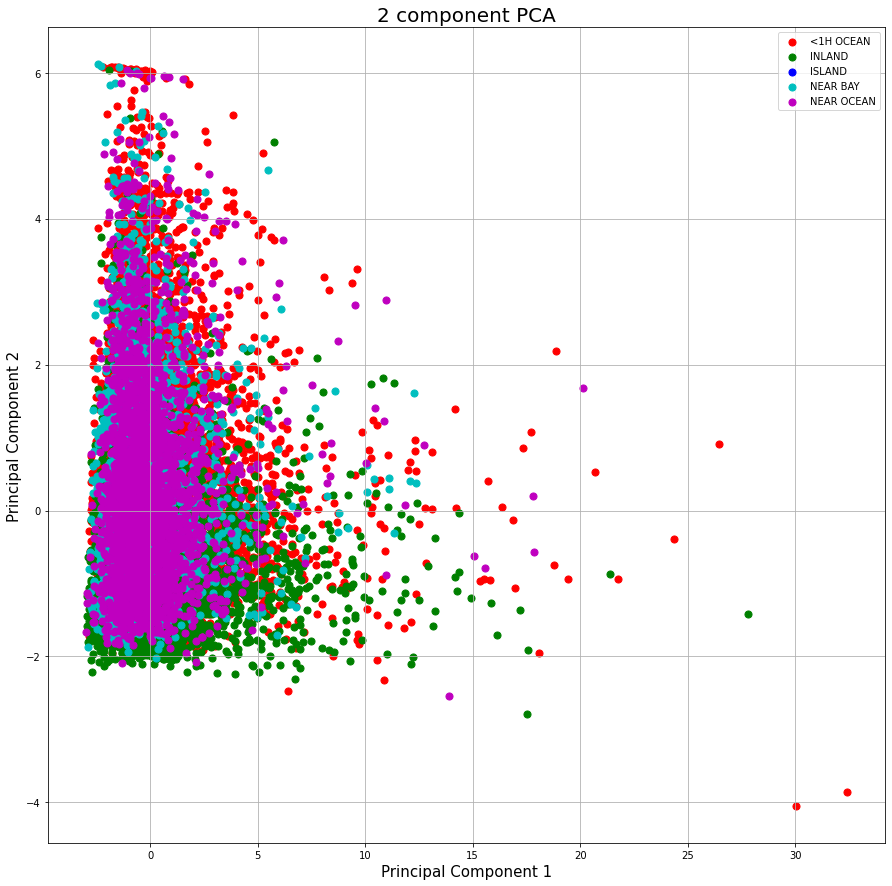

In [31]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['ocean_proximity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()

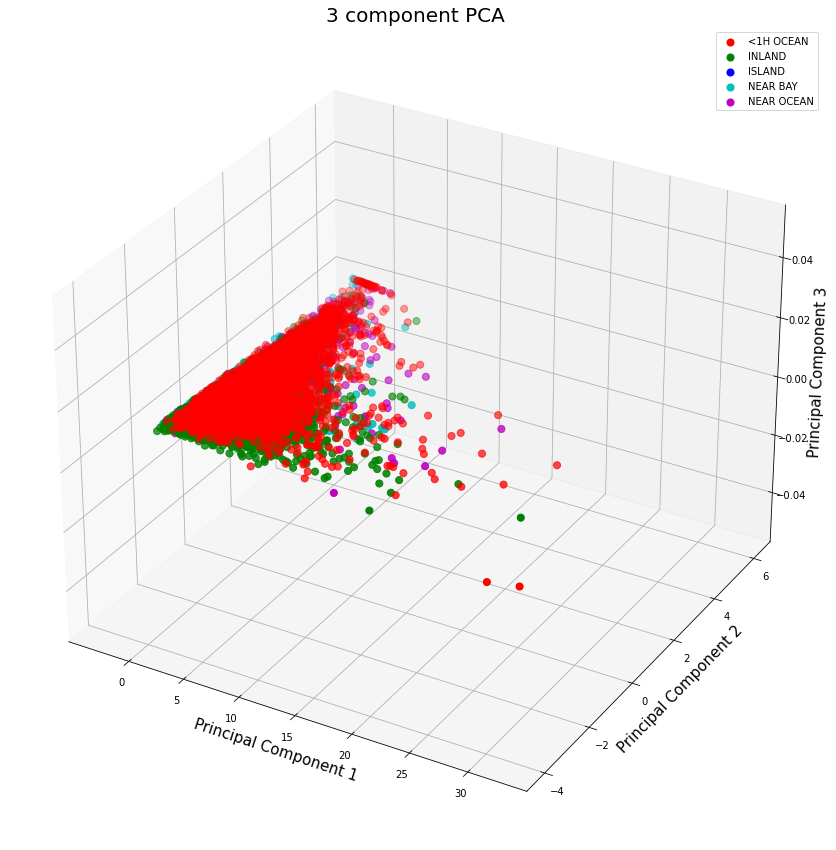

In [32]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize=20)
targets = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
colors = ['r', 'g', 'b', 'c', 'm']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['ocean_proximity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()